In [1]:
import cv2
cap = cv2.VideoCapture(0)

In [2]:
car_model=cv2.CascadeClassifier('cars.xml')

# TO DETECT CAR ON LIVE VIDEO OR PHOTO.....

In [3]:

while True:
    ret,frame=cap.read()
    cars=car_model.detectMultiScale(frame)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    for(x,y,w,h) in cars:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),1)
    cv2.imshow('car',frame)
    if cv2.waitKey(10)==13:
        break
cv2.destroyAllWindows()        

In [4]:
cap.release()

In [5]:
#main start here
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

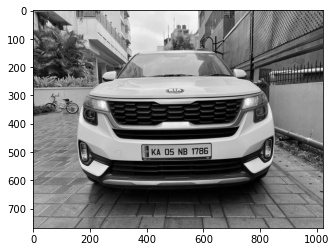

In [6]:
#main code
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

#FOR REAL USE CASE and LIVE NUMBER PLATE OF CAR
''''while(cap.isOpened()):
    ret, frame = cap.read()
    gra = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('carpic.jpg',frame)
    cv2.imshow('frame',gra)
    if cv2.waitKey(10) == 13:
        break

cap.release()
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(gra, cv2.COLOR_BGR2RGB))'''

#USING A IMAGE FROM GOOGLE FOR REFERENCE USE CASE

img=cv2.imread('car11 test.jpeg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

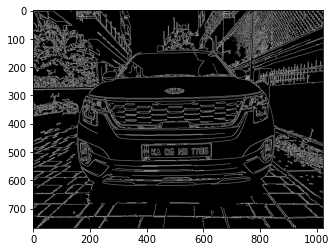

In [7]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img,img, mask=mask)

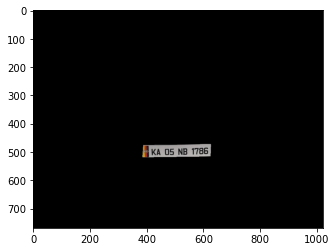

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

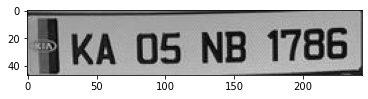

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
F:\Summer Intership MLOPS\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


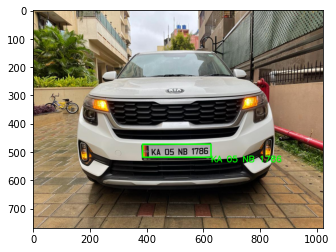

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [12]:
#Removing spaces from the detected number 
def remove(text):
    return text.replace(" ", "")
      
extracted_number=remove(text)
print(extracted_number)

KA05NB1786


In [13]:
#SELENIUM TO EXTRACT DATA FROM THE THIRD PARTY WEBSITE HERE i used CARS24.Com (VALID  for some number)

#YOU CAN PAY FOR OTHER THIRD PARTY WEBSITES FOR MORE NUMBER PLATES

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

reg_no=extracted_number;
driver = webdriver.Chrome("C:\\chromedriver\\chromedriver.exe")
driver.get("https://www.cars24.com/rto-vehicle-registration-details/")
driver.maximize_window()
time.sleep(5)
#Cross button
driver.find_element_by_xpath("/html/body/div[1]/div[5]/div/div/h3/div/img").click()
time.sleep(3)

#sending value
driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div[1]/div[2]/form/div/input").click()
last=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div[1]/div[2]/form/div/input")
last.send_keys(reg_no)
time.sleep(2)

#button click
driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div[1]/button").click()
time.sleep(3)

#data of user
data=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[1]/div[1]")

data_in_text=data.text
print(data_in_text)

phone=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[1]/div[1]/div[1]/div/ul/li[4]/span[2]")
phone_number=phone.text
#clossing driver
driver.close()

#saving into a file
text_file = open("sample.txt", "w")
n = text_file.write(data_in_text)
text_file.close()

KA Registration - Regional Transport Office (RTO) KA-05
Number
KA-05
City
Bangalore South - Jayanagar
State
Karnataka
Phone
+91-80-26630989
Email ID
rtobngska@nic.in
Address
Jayanagar Shopping Complex, 4th Block, Jayanagar, Bangalore -560011
Search Another Vehicle Registration Number
Vehicle registration details
GET RTO DETAILS


 # then you can send sms for the voilation of rule etc if you want ...

In [14]:
#Phone Number  of user
print(phone_number)

+91-80-26630989
